# Data cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
nlp = pd.read_excel("ReviewsAndRatings.xlsx")

In [3]:
nlp.head(5)

Unnamed: 0                                            reviews  ratings
0           0  Really hate the product. Its wastage of money....        1
1           1  Your browser does not support HTML5 video.\n P...        1
2           2      laptop is hanging if we install more products        1
3           3  A used product that was damaged was delivered....        1
4           4  Your browser does not support HTML5 video.\n T...        1

In [4]:
nlp.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
nlp.head(5)

reviews  ratings
0  Really hate the product. Its wastage of money....        1
1  Your browser does not support HTML5 video.\n P...        1
2      laptop is hanging if we install more products        1
3  A used product that was damaged was delivered....        1
4  Your browser does not support HTML5 video.\n T...        1

In [6]:
nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31908 entries, 0 to 31907
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  31869 non-null  object
 1   ratings  31908 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 498.7+ KB


<AxesSubplot:xlabel='ratings', ylabel='count'>

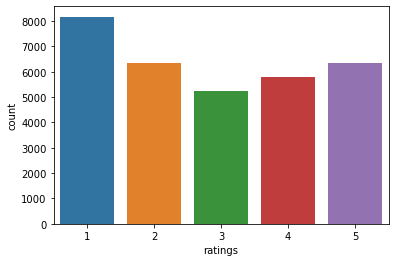

In [7]:
sns.countplot(nlp['ratings'])

In [8]:
nlp['ratings'].value_counts()

1    8168
2    6361
5    6343
4    5799
3    5237
Name: ratings, dtype: int64

We see different amount of reviews and ratings in our data set. To make sure our data set is balanced we will reduce all the rating categories to a finite value or same value. We will make sure all the ratings have 5237 entries.

In [9]:
nlp1 = nlp[nlp['ratings']==1]
nlp2 = nlp[nlp['ratings']==2]
nlp3 = nlp[nlp['ratings']==3]
nlp4 = nlp[nlp['ratings']==4]
nlp5 = nlp[nlp['ratings']==5]

Created 5 sepearate dataframes and now will create a single dataframe with equal number of entries in all the categories.

In [10]:
equal = pd.concat([nlp1[0:5237], nlp2[0:5237], nlp3[0:5237], nlp4[0:5237], nlp5[0:5237]])

In [11]:
equal.shape

(26185, 2)

In [12]:
equal['ratings'].value_counts()

5    5237
4    5237
3    5237
2    5237
1    5237
Name: ratings, dtype: int64

Done. Let's move forward. 

In [13]:
equal_copy = equal.copy()

Just to make sure we have saved the work so far.

Let us now convert all the reviews in lower case

In [14]:
equal['reviews'] = equal['reviews'].str.lower()

In [15]:
equal['reviews'] = equal['reviews'].apply(str)

In [16]:
equal.head()

reviews  ratings
0  really hate the product. its wastage of money....        1
1  your browser does not support html5 video.\n p...        1
2      laptop is hanging if we install more products        1
3  a used product that was damaged was delivered....        1
4  your browser does not support html5 video.\n t...        1

All the reviews have been processed to lower case.

In [17]:
# creating a function to clean data of brackets, numbers or digits, punctuations, new line characters and quotes.

import re
import string

def text_clean(text):
    text = re.sub('[%s]'%re.escape(string.punctuation), '', text) # removes punctuations
    text = re.sub('\w*\d\w*', '', text) #removes digits
    text = re.sub('\n', '', text) #removes new line characters
    text = re.sub('[''""]', '', text) # removes quotes
    text = re.sub('\[.*?\]', '', text) #removes brackets
    return text

cleaned = lambda x : text_clean(x)

In [18]:
equal['cleaned_reviews'] = pd.DataFrame(equal.reviews.apply(cleaned))

In [19]:
equal

reviews  ratings  \
0      really hate the product. its wastage of money....        1   
1      your browser does not support html5 video.\n p...        1   
2          laptop is hanging if we install more products        1   
3      a used product that was damaged was delivered....        1   
4      your browser does not support html5 video.\n t...        1   
...                                                  ...      ...   
25764  exlent bass,and sound quality very very very s...        5   
25765  tbh, i had not heard about "elevn". i happened...        5   
25766  best product under this price. you have to set...        5   
25767                                    value for money        5   
25768  product was delivered good way. easy to config...        5   

                                         cleaned_reviews  
0      really hate the product its wastage of money i...  
1      your browser does not support  video please do...  
2          laptop is hanging if we install more products  
3      a used product that was damaged was delivered ...  
4      your browser does not support  video too slow ...  
...                                                  ...  
25764  exlent bassand sound quality very very very su...  
25765  tbh i had not heard about elevn i happened to ...  
25766  best product under this price you have to set ...  
25767                                    value for money  
25768  product was delivered good way easy to configu...  

[26185 rows x 3 columns]

We have now cleaned the text. We will now remove stop words as these words do not help in our model or problem statement.

In [20]:
from nltk.corpus import stopwords

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
equal['cleaned_reviews'] = equal['cleaned_reviews'].apply(lambda x :' '.join(
term for term in x.split() if term not in stop_words))

## Looking at the louds words in each category

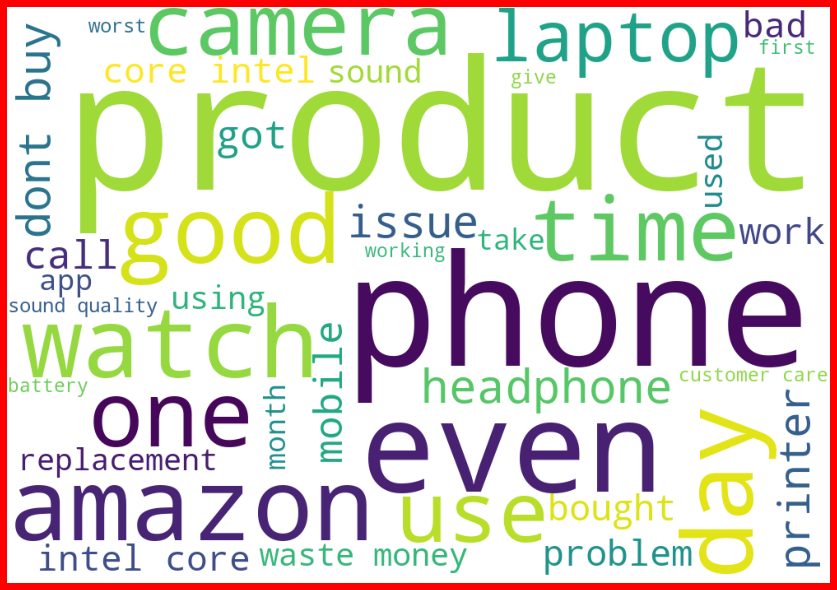

In [23]:
#Getting sense of loud words in each category.
from wordcloud import WordCloud

onestar = equal['cleaned_reviews'][equal['ratings']==1]

onestar_cloud = WordCloud(width= 1000, height= 700, background_color = 'White', max_words=40).generate(' '.join(onestar))

plt.figure(figsize=(18,8), facecolor='r')
plt.imshow(onestar_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

For 1 star rating we have word such as issue, dont, bad, sound etc. Which is expected.

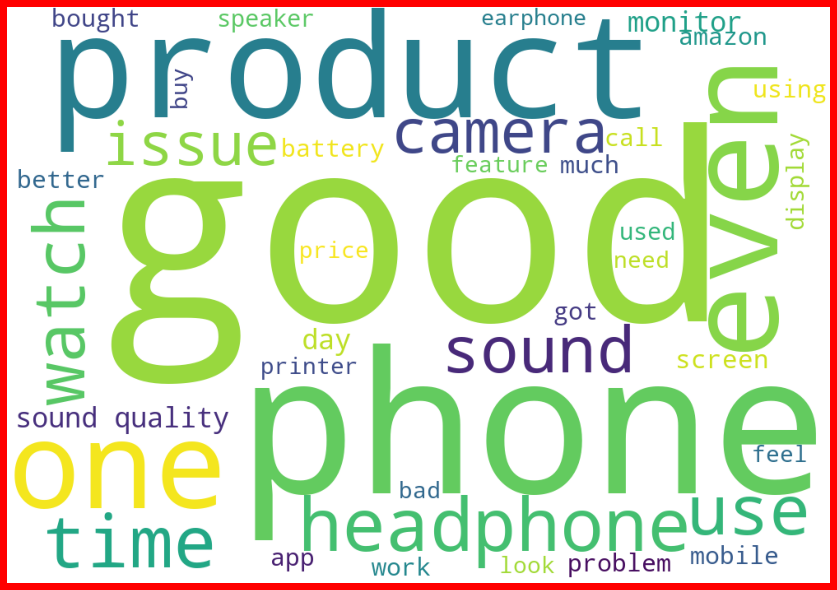

In [24]:
twostar = equal['cleaned_reviews'][equal['ratings']==2]

twostar_cloud = WordCloud(width= 1000, height= 700, background_color = 'White', max_words=40).generate(' '.join(twostar))

plt.figure(figsize=(18,8), facecolor='r')
plt.imshow(twostar_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see multiple words as well in this segment. We may need to use 1,2 and 3 gram while using vectoriser.

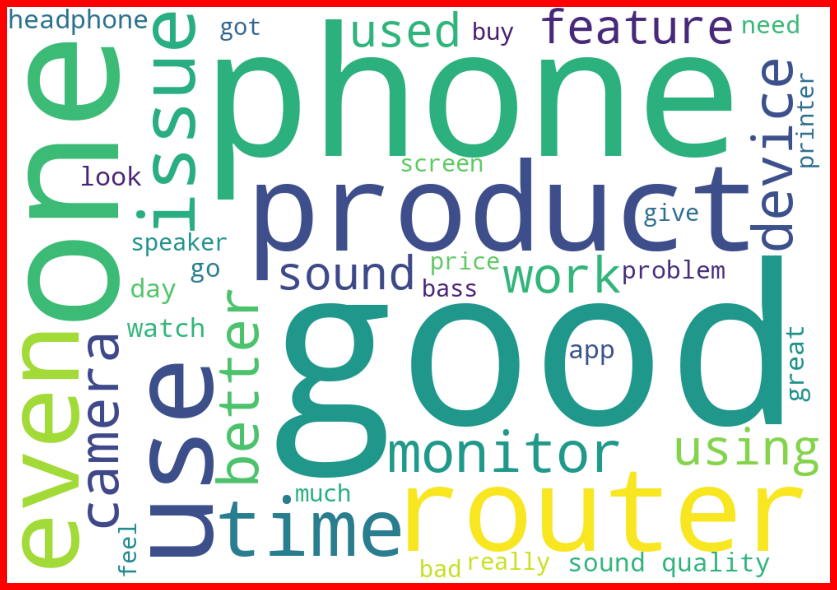

In [25]:
threestar = equal['cleaned_reviews'][equal['ratings']==3]

threestar_cloud = WordCloud(width= 1000, height= 700, background_color = 'White', max_words=40).generate(' '.join(threestar))

plt.figure(figsize=(18,8), facecolor='r')
plt.imshow(threestar_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see some positive words in this such as good, better in this loud word plot.

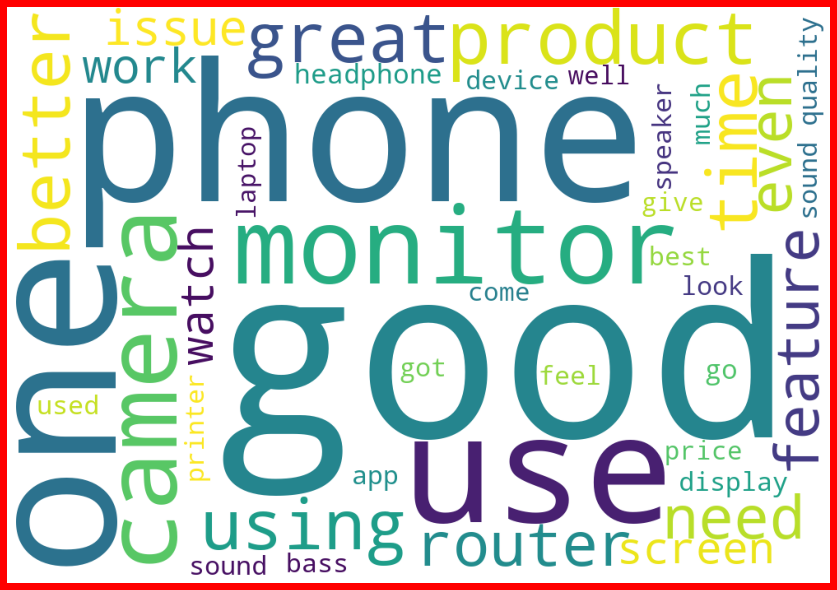

In [26]:
fourstar = equal['cleaned_reviews'][equal['ratings']==4]

fourstar_cloud = WordCloud(width= 1000, height= 700, background_color = 'White', max_words=40).generate(' '.join(fourstar))

plt.figure(figsize=(18,8), facecolor='r')
plt.imshow(fourstar_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

4 stars do have even more positive words. Good seems to be the loudeset word in this rating category.

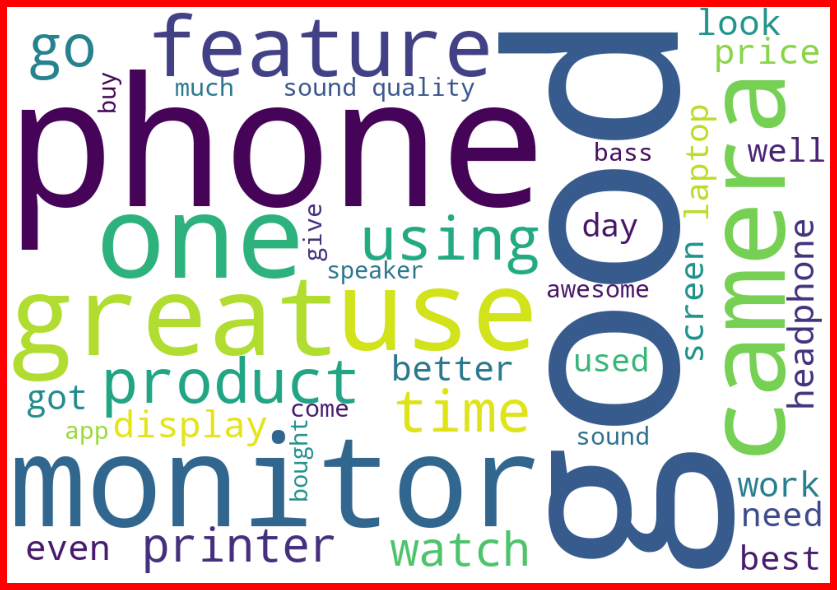

In [27]:
fivestar = equal['cleaned_reviews'][equal['ratings']==5]

fivestar_cloud = WordCloud(width= 1000, height= 700, background_color = 'White', max_words=40).generate(' '.join(fivestar))

plt.figure(figsize=(18,8), facecolor='r')
plt.imshow(fivestar_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Awesome,great, good, buy are loud words in this category. However, as thought we will definetly use multiple ngrams to make sure we have a good and exact predicting model.

# Model building

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
#creating a instance
tfidf = TfidfVectorizer(max_features=30000, ngram_range=(1,4), analyzer='char')

In [30]:
x = tfidf.fit_transform(equal['cleaned_reviews'])
y = equal['ratings']

In [31]:
x.shape

(26185, 30000)

In [32]:
y.shape

(26185,)

## Importing all the algorithms, train test split and metrics.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import  MultinomialNB

Imported all the required algorithms and packages

## Finding the best random state for the model


In [36]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearSVC()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.6341416841703266 on random state 141


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=141)

## Testing models


In [38]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5783845713194578
[[771 155  69  32  14]
 [287 519 155  86  46]
 [108 175 498 153  96]
 [ 50  80 154 485 232]
 [ 46  34  40 196 756]]
              precision    recall  f1-score   support

           1       0.61      0.74      0.67      1041
           2       0.54      0.47      0.50      1093
           3       0.54      0.48      0.51      1030
           4       0.51      0.48      0.50      1001
           5       0.66      0.71      0.68      1072

    accuracy                           0.58      5237
   macro avg       0.57      0.58      0.57      5237
weighted avg       0.57      0.58      0.57      5237



In [39]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5978613710139393
[[702 143  93  59  44]
 [150 654 129  90  70]
 [ 87 115 603 130  95]
 [ 59  91 132 523 196]
 [ 47  82 113 181 649]]
              precision    recall  f1-score   support

           1       0.67      0.67      0.67      1041
           2       0.60      0.60      0.60      1093
           3       0.56      0.59      0.57      1030
           4       0.53      0.52      0.53      1001
           5       0.62      0.61      0.61      1072

    accuracy                           0.60      5237
   macro avg       0.60      0.60      0.60      5237
weighted avg       0.60      0.60      0.60      5237



In [40]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6513270956654573
[[859  87  31  27  37]
 [232 636  80  79  66]
 [114 113 580 124  99]
 [ 44  60 114 541 242]
 [ 58  39  32 148 795]]
              precision    recall  f1-score   support

           1       0.66      0.83      0.73      1041
           2       0.68      0.58      0.63      1093
           3       0.69      0.56      0.62      1030
           4       0.59      0.54      0.56      1001
           5       0.64      0.74      0.69      1072

    accuracy                           0.65      5237
   macro avg       0.65      0.65      0.65      5237
weighted avg       0.65      0.65      0.65      5237



In [41]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.4466297498567882
[[632 273  56  52  28]
 [318 457 131 134  53]
 [130 270 263 233 134]
 [ 47 142 134 355 323]
 [ 44  99  51 246 632]]
              precision    recall  f1-score   support

           1       0.54      0.61      0.57      1041
           2       0.37      0.42      0.39      1093
           3       0.41      0.26      0.32      1030
           4       0.35      0.35      0.35      1001
           5       0.54      0.59      0.56      1072

    accuracy                           0.45      5237
   macro avg       0.44      0.44      0.44      5237
weighted avg       0.44      0.45      0.44      5237



In [42]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.41015848768378843
[[424 316 135  99  67]
 [138 603 178 122  52]
 [ 61 297 406 172  94]
 [ 42 239 209 363 148]
 [ 35 236 233 216 352]]
              precision    recall  f1-score   support

           1       0.61      0.41      0.49      1041
           2       0.36      0.55      0.43      1093
           3       0.35      0.39      0.37      1030
           4       0.37      0.36      0.37      1001
           5       0.49      0.33      0.39      1072

    accuracy                           0.41      5237
   macro avg       0.44      0.41      0.41      5237
weighted avg       0.44      0.41      0.41      5237



In [43]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6528546877983579
[[820 132  51  26  12]
 [212 660 129  66  26]
 [ 82 170 589 132  57]
 [ 38  65 131 575 192]
 [ 37  38  29 193 775]]
              precision    recall  f1-score   support

           1       0.69      0.79      0.74      1041
           2       0.62      0.60      0.61      1093
           3       0.63      0.57      0.60      1030
           4       0.58      0.57      0.58      1001
           5       0.73      0.72      0.73      1072

    accuracy                           0.65      5237
   macro avg       0.65      0.65      0.65      5237
weighted avg       0.65      0.65      0.65      5237



In [44]:
lsv = LinearSVC()
lsv.fit(x_train,y_train)
pred = lsv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6341416841703266
[[810 121  58  24  28]
 [246 604 128  74  41]
 [ 89 134 584 143  80]
 [ 30  66 148 542 215]
 [ 33  32  43 183 781]]
              precision    recall  f1-score   support

           1       0.67      0.78      0.72      1041
           2       0.63      0.55      0.59      1093
           3       0.61      0.57      0.59      1030
           4       0.56      0.54      0.55      1001
           5       0.68      0.73      0.70      1072

    accuracy                           0.63      5237
   macro avg       0.63      0.63      0.63      5237
weighted avg       0.63      0.63      0.63      5237



In [45]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5365667366813061
[[744 179  53  50  15]
 [271 508 127 138  49]
 [122 185 418 208  97]
 [ 55 104 133 457 252]
 [ 53  67  37 232 683]]
              precision    recall  f1-score   support

           1       0.60      0.71      0.65      1041
           2       0.49      0.46      0.48      1093
           3       0.54      0.41      0.46      1030
           4       0.42      0.46      0.44      1001
           5       0.62      0.64      0.63      1072

    accuracy                           0.54      5237
   macro avg       0.53      0.54      0.53      5237
weighted avg       0.54      0.54      0.53      5237



In [46]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
pred = mnb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5176627840366622
[[753 130  95  35  28]
 [340 368 161 141  83]
 [129 146 402 232 121]
 [ 73  70 132 475 251]
 [ 60  25  43 231 713]]
              precision    recall  f1-score   support

           1       0.56      0.72      0.63      1041
           2       0.50      0.34      0.40      1093
           3       0.48      0.39      0.43      1030
           4       0.43      0.47      0.45      1001
           5       0.60      0.67      0.63      1072

    accuracy                           0.52      5237
   macro avg       0.51      0.52      0.51      5237
weighted avg       0.51      0.52      0.51      5237



Clearly Random Forest, SVM and linearSVC has better accuracy, however, this accuracy is not very high. We will now crossvalidate the algorithms.

# Crossvalidation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.4009547450830627


In [49]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.353981286996372


In [50]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.2587741073133473


In [51]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.3514989497804087


In [52]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", ad.mean())

Cross validation score of AdaBoost Classifier: 0.32018331105594805


In [53]:
lsvc = cross_val_score(lsv, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", lsvc.mean())

Cross validation score of GradientBoost Classifier: 0.3739545541340462


We will now perform, hyperparameter tuning with LinearSVC, Random Forest and SVC and will choose model which ever performs well or gives better Accuracy score.

In [54]:
from sklearn.model_selection import RandomizedSearchCV

## Hyperparameter Tuning with LinearSVC

In [55]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'loss':['hinge', 'squared_hinge'],'C': [1,5,10,15]}

In [56]:
RCV = RandomizedSearchCV(LinearSVC(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearSVC(),
                   param_distributions={'C': [1, 5, 10, 15],
                                        'loss': ['hinge', 'squared_hinge']})

In [57]:
#Printing the best parameters.
RCV.best_params_

{'loss': 'squared_hinge', 'C': 5}

## Model with LinearSVC

In [58]:
model1 = LinearSVC(loss= 'squared_hinge', C=5)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

64.86538094328814
[[797 132  60  30  22]
 [177 654 146  69  47]
 [ 74 128 619 131  78]
 [ 28  60 133 571 209]
 [ 29  31  52 204 756]]
              precision    recall  f1-score   support

           1       0.72      0.77      0.74      1041
           2       0.65      0.60      0.62      1093
           3       0.61      0.60      0.61      1030
           4       0.57      0.57      0.57      1001
           5       0.68      0.71      0.69      1072

    accuracy                           0.65      5237
   macro avg       0.65      0.65      0.65      5237
weighted avg       0.65      0.65      0.65      5237



## Hyperparameter Tuning with RandomForest

In [59]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': [2,3],
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100] }

In [60]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100]})

In [61]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 3,
 'criterion': 'entropy'}

## Model with Random Forest

In [62]:
model2 = RandomForestClassifier(n_estimators= 100, max_features= 'sqrt', max_depth= 3, criterion= 'entropy')
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

39.25911781554325
[[870  35  19  91  26]
 [662  92  46 231  62]
 [361  77 185 302 105]
 [235  44  92 415 215]
 [231  31  24 292 494]]
              precision    recall  f1-score   support

           1       0.37      0.84      0.51      1041
           2       0.33      0.08      0.13      1093
           3       0.51      0.18      0.27      1030
           4       0.31      0.41      0.36      1001
           5       0.55      0.46      0.50      1072

    accuracy                           0.39      5237
   macro avg       0.41      0.39      0.35      5237
weighted avg       0.41      0.39      0.35      5237



Model2 has performance is really low and gave results lower than normal model with random forest.

In [63]:
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

65.55279740309338
[[853  96  32  31  29]
 [218 655  83  89  48]
 [115 117 576 120 102]
 [ 38  57 105 551 250]
 [ 52  29  29 164 798]]
              precision    recall  f1-score   support

           1       0.67      0.82      0.74      1041
           2       0.69      0.60      0.64      1093
           3       0.70      0.56      0.62      1030
           4       0.58      0.55      0.56      1001
           5       0.65      0.74      0.69      1072

    accuracy                           0.66      5237
   macro avg       0.66      0.65      0.65      5237
weighted avg       0.66      0.66      0.65      5237



In [64]:
model4 = RandomForestClassifier(n_estimators= 100, max_features= 'sqrt', max_depth= 3,)
model4.fit(x_train,y_train)
pred = model4.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

39.45006683215582
[[875  31  15 102  18]
 [650  67  53 248  75]
 [353  65 196 301 115]
 [231  53  88 418 211]
 [237  44  23 258 510]]
              precision    recall  f1-score   support

           1       0.37      0.84      0.52      1041
           2       0.26      0.06      0.10      1093
           3       0.52      0.19      0.28      1030
           4       0.31      0.42      0.36      1001
           5       0.55      0.48      0.51      1072

    accuracy                           0.39      5237
   macro avg       0.40      0.40      0.35      5237
weighted avg       0.40      0.39      0.35      5237



In [65]:
model5 = RandomForestClassifier(n_estimators= 100, max_features= 'sqrt')
model5.fit(x_train,y_train)
pred = model5.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

66.03016994462479
[[857  89  38  35  22]
 [217 666  73  82  55]
 [112 105 595 118 100]
 [ 46  60  99 549 247]
 [ 50  39  36 156 791]]
              precision    recall  f1-score   support

           1       0.67      0.82      0.74      1041
           2       0.69      0.61      0.65      1093
           3       0.71      0.58      0.64      1030
           4       0.58      0.55      0.57      1001
           5       0.65      0.74      0.69      1072

    accuracy                           0.66      5237
   macro avg       0.66      0.66      0.66      5237
weighted avg       0.66      0.66      0.66      5237



In [66]:
model6 = RandomForestClassifier(n_estimators= 100)
model6.fit(x_train,y_train)
pred = model6.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

65.896505632996
[[860  90  32  37  22]
 [221 660  85  74  53]
 [111 112 581 129  97]
 [ 48  53  98 567 235]
 [ 49  33  26 181 783]]
              precision    recall  f1-score   support

           1       0.67      0.83      0.74      1041
           2       0.70      0.60      0.65      1093
           3       0.71      0.56      0.63      1030
           4       0.57      0.57      0.57      1001
           5       0.66      0.73      0.69      1072

    accuracy                           0.66      5237
   macro avg       0.66      0.66      0.65      5237
weighted avg       0.66      0.66      0.66      5237



In [71]:
model7 = RandomForestClassifier(max_depth= 3)
model7.fit(x_train,y_train)
pred = model7.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

39.37368722551079
[[857  33  36  93  22]
 [614  98  80 232  69]
 [336  73 216 291 114]
 [207  44 111 400 239]
 [215  34  38 294 491]]
              precision    recall  f1-score   support

           1       0.38      0.82      0.52      1041
           2       0.35      0.09      0.14      1093
           3       0.45      0.21      0.29      1030
           4       0.31      0.40      0.35      1001
           5       0.53      0.46      0.49      1072

    accuracy                           0.39      5237
   macro avg       0.40      0.40      0.36      5237
weighted avg       0.40      0.39      0.36      5237



In [72]:
model8 = RandomForestClassifier(max_features= 'sqrt')
model8.fit(x_train,y_train)
pred = model8.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

65.26637387817453
[[848  95  38  31  29]
 [226 651  73  78  65]
 [111 113 591 115 100]
 [ 48  56  91 544 262]
 [ 48  34  34 172 784]]
              precision    recall  f1-score   support

           1       0.66      0.81      0.73      1041
           2       0.69      0.60      0.64      1093
           3       0.71      0.57      0.64      1030
           4       0.58      0.54      0.56      1001
           5       0.63      0.73      0.68      1072

    accuracy                           0.65      5237
   macro avg       0.65      0.65      0.65      5237
weighted avg       0.66      0.65      0.65      5237



In [73]:
model9 = RandomForestClassifier(n_estimators= 100, max_depth= 3)
model9.fit(x_train,y_train)
pred = model9.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

39.12545350391446
[[861  32  28  91  29]
 [624  80  54 271  64]
 [333  76 193 315 113]
 [206  41  90 432 232]
 [223  31  34 301 483]]
              precision    recall  f1-score   support

           1       0.38      0.83      0.52      1041
           2       0.31      0.07      0.12      1093
           3       0.48      0.19      0.27      1030
           4       0.31      0.43      0.36      1001
           5       0.52      0.45      0.48      1072

    accuracy                           0.39      5237
   macro avg       0.40      0.39      0.35      5237
weighted avg       0.40      0.39      0.35      5237



Model5 has better performance than any other models.

# SAVING THE BEST MODEL FOR SUBMISSION.

We will save model with RandomForest model5.

In [74]:
import joblib
joblib.dump(model5,"Ratings_prediction.pkl")

['Ratings_prediction.pkl']

In [86]:
import nltk
from nltk.tokenize import word_tokenize

In [84]:
#Testing the model.
test = "I do not like the product. This product is really bad"

In [87]:
test_splits = nltk.word_tokenize(test)

In [88]:
tokens_without_sw = [word for word in test_splits if not word in stop_words]

In [89]:
filtered_sentence = (" ").join(tokens_without_sw)

In [93]:
final_test = tfidf.transform([filtered_sentence])

In [94]:
model5.predict(final_test)

array([1], dtype=int64)

Awesome! We got the correct output.